#**Employee Recruitment Prediction using Decision Tree and Random Forest classification model**

The dataset will be working on is **'data-employee-recruitment.csv'**. It is composed of attributes such as employee gender, education level, company size, etc., to develop an employee recruitment prediction model.

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data-employee-recruitment.csv")

In [3]:
df.head()

enrollee_id  city_development_index  gender      relevent_experience  \
0        14569                   0.704    Male  Has relevent experience   
1        10557                   0.594  Female  Has relevent experience   
2        14095                   0.596    Male  Has relevent experience   
3        16300                   0.614    Male  Has relevent experience   
4        14550                   0.534    Male   No relevent experience   

  enrolled_university education_level major_discipline experience  \
0    Full time course        Graduate             STEM          2   
1    Full time course         Masters             STEM          9   
2    Part time course        Graduate       Humanities          2   
3    Full time course         Masters             STEM          4   
4    Full time course        Graduate             STEM         <1   

  company_size         company_type last_new_job  training_hours  target  
0        50-99              Pvt Ltd            2              71     1.0  
1        50-99  Early Stage Startup        never             217     1.0  
2      100-500              Pvt Ltd            2              12     1.0  
3        50-99              Pvt Ltd            1              20     1.0  
4        50-99  Early Stage Startup            1              52     1.0

## **EDA & Data Preprocessing**

### **1. Check the Missing Values**

In [4]:
df.shape

(2135, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2135 non-null   int64  
 1   city_development_index  2135 non-null   float64
 2   gender                  2135 non-null   object 
 3   relevent_experience     2135 non-null   object 
 4   enrolled_university     2135 non-null   object 
 5   education_level         2135 non-null   object 
 6   major_discipline        2135 non-null   object 
 7   experience              2135 non-null   object 
 8   company_size            2135 non-null   object 
 9   company_type            2135 non-null   object 
 10  last_new_job            2135 non-null   object 
 11  training_hours          2135 non-null   int64  
 12  target                  2135 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 217.0+ KB


The provided dataset has no missing values in all features.

In [6]:
df = df.drop('enrollee_id', axis = 1)

In [7]:
df.describe()

city_development_index  training_hours       target
count             2135.000000     2135.000000  2135.000000
mean                 0.756329       65.296956     0.515222
std                  0.145332       63.639919     0.499885
min                  0.450000       -5.000000     0.000000
25%                  0.624000       22.000000     0.000000
50%                  0.743000       45.000000     1.000000
75%                  0.910000       87.500000     1.000000
max                  1.026000      336.000000     1.000000

In [8]:
df.describe(include=[object])

gender      relevent_experience enrolled_university education_level  \
count    2135                     2135                2135            2135   
unique      2                        2                   2               3   
top      Male  Has relevent experience    Full time course        Graduate   
freq     1957                     1600                1444            1627   

       major_discipline experience company_size company_type last_new_job  
count              2135       2135         2135         2135         2135  
unique                6         22            8            6            6  
top                STEM          3        50-99      Pvt Ltd            1  
freq               1983        287          488         1524         1152

There are 9 categorical features and 3 numerical features.

### **2. Encoder the categorical features**

In [9]:
from sklearn.preprocessing import LabelEncoder

In [11]:
categorical_f = [col for col in df.columns if df[col].dtypes=="object"]

In [10]:
data = df.copy()

In [12]:
# Encoder
encoder = LabelEncoder()

for i in categorical_f:
  data[i] = encoder.fit_transform(data[i])

In [13]:
data.head()

city_development_index  gender  relevent_experience  enrolled_university  \
0                   0.704       1                    0                    0   
1                   0.594       0                    0                    0   
2                   0.596       1                    0                    1   
3                   0.614       1                    0                    0   
4                   0.534       1                    1                    0   

   education_level  major_discipline  experience  company_size  company_type  \
0                0                 5          11             4             5   
1                1                 5          19             4             0   
2                0                 2          11             1             5   
3                1                 5          14             4             5   
4                0                 5          20             4             0   

   last_new_job  training_hours  target  
0             1              71     1.0  
1             5             217     1.0  
2             1              12     1.0  
3             0              20     1.0  
4             0              52     1.0

### **3. Box plot & Heat map**

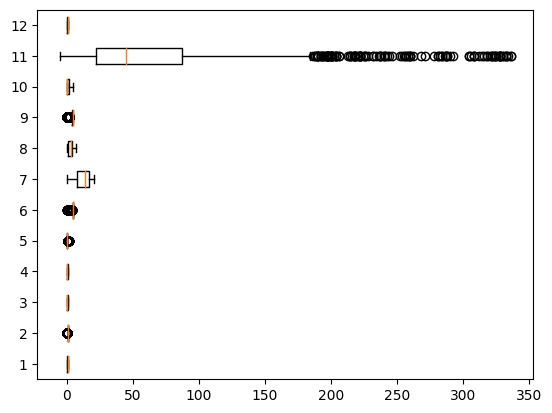

In [14]:
# Box plot
plt.boxplot(data, vert = False)

plt.show()

Since Decision Tree and Random Forest are generally robust to outliers, removing outliers is not required.

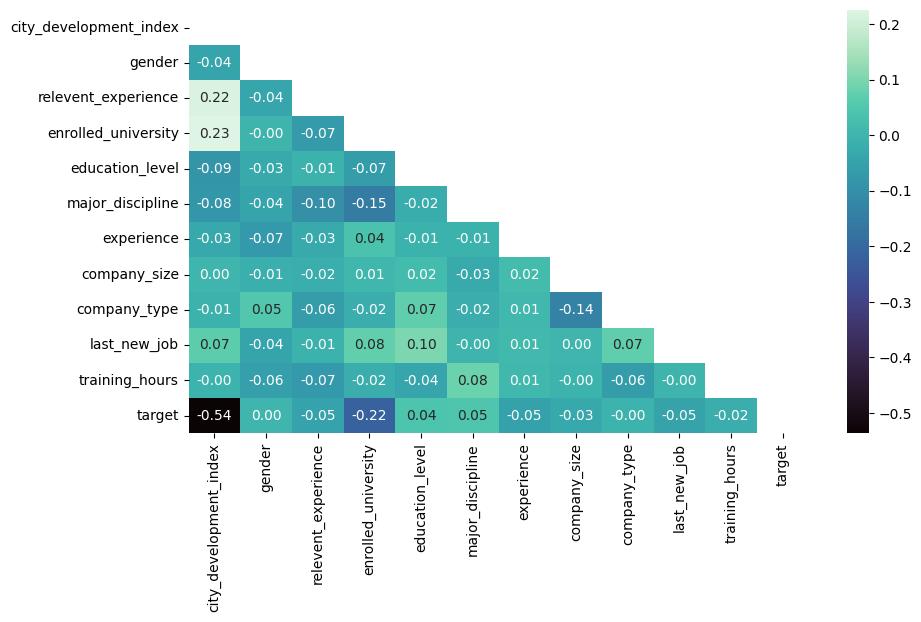

In [15]:
# Heat map
lt = np.triu(data.corr())

fig = plt.figure(figsize=(10,5.5))

sns.heatmap(data.corr(), annot = True, cbar = 'True', mask = lt, fmt='.2f', cmap= "mako");

## **Training**

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
x = data.drop("target", axis = 1)
y = data["target"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, random_state = 5, test_size = 0.2)

In [19]:
print(np.unique(y_train, return_counts=True))

(array([0., 1.]), array([820, 888]))


We have:
*   Target label 0: 820 data points
*   Target label 1: 888 data points \\

Given that the difference between label 1 and label 0 is small (less than 100), this dataset can be considered as an unbalanced dataset within an acceptable range. Therefore, the application of SMOTE is not required in this particular instance.

### **1. Decision Tree**

In [20]:
params = {"criterion": ["gini", "entropy"],                     # Criterion to evaluate the purity.
          "max_depth": [i for i in range (3,7)],                # Maximum depth of the tree
          "min_samples_split": [i for i in range (3,9)]}        # Stop splitting condition.

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=10)

In [21]:
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6, 7, 8]})

In [22]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 7}

In [23]:
grid_search.best_score_

0.8196835225318196

In [24]:
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                                  random_state = 3,
                                  max_depth=grid_search.best_params_['max_depth'],
                                  min_samples_split=grid_search.best_params_['min_samples_split'])

In [25]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=7, random_state=3)

In [26]:
pred_y_dt = model_dt.predict(x_test)

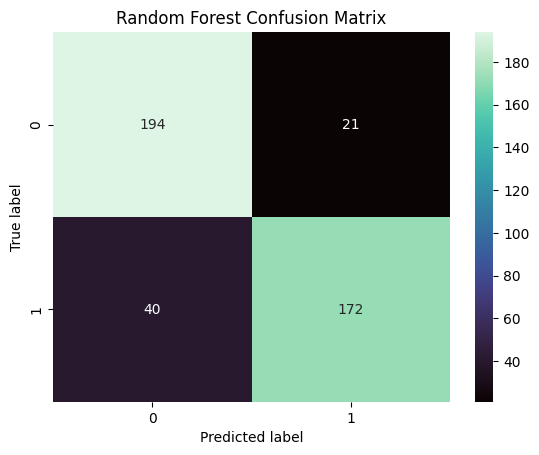

In [27]:
c_matrix_dt = confusion_matrix(y_test, pred_y_dt)

sns.heatmap(c_matrix_dt, annot=True, fmt='d', cmap = "mako")

plt.title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
print(classification_report(y_test, pred_y_dt))

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       215
         1.0       0.89      0.81      0.85       212

    accuracy                           0.86       427
   macro avg       0.86      0.86      0.86       427
weighted avg       0.86      0.86      0.86       427



### **2. Random Forest**

In [29]:
params = {"criterion": ["gini", "entropy"],                  # Criterion to evaluate the purity.
          "max_depth": [7, 9, 11],                           # Maximum depth of the tree
          "min_samples_split": [8, 12, 16, 20]}              # Stop splitting condition.

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, n_jobs=10), param_grid=params, cv= 10)

# Run the search on oversampled training data samples
grid_search_rf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=10, n_jobs=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_split': [8, 12, 16, 20]})

In [30]:
grid_search_rf.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 8}

In [31]:
grid_search_rf.best_score_

0.853047815617475

In [32]:
model_rf = RandomForestClassifier(n_estimators=10,
                                  random_state=50,
                                  criterion=grid_search_rf.best_params_['criterion'],
                                  max_depth=grid_search_rf.best_params_['max_depth'],
                                  min_samples_split=grid_search_rf.best_params_['min_samples_split'])     # Initialize the RandomForest

In [33]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=8,
                       n_estimators=10, random_state=50)

In [34]:
pred_y_rf = model_rf.predict(x_test)

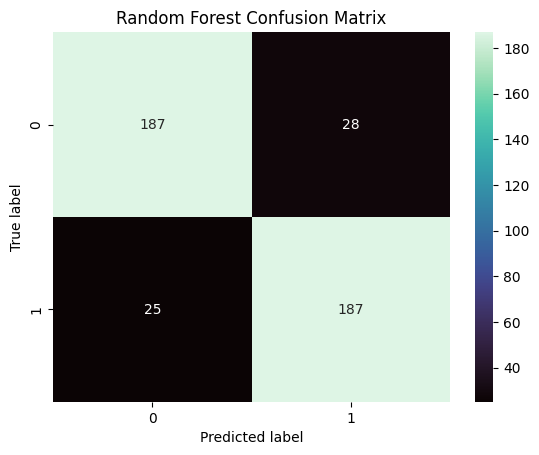

In [35]:
c_matrix_rf = confusion_matrix(y_test, pred_y_rf)

sns.heatmap(c_matrix_rf, annot=True, fmt='d', cmap = "mako")

plt.title('Random Forest Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [36]:
print(classification_report(y_test, pred_y_rf))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88       215
         1.0       0.87      0.88      0.88       212

    accuracy                           0.88       427
   macro avg       0.88      0.88      0.88       427
weighted avg       0.88      0.88      0.88       427



## **Feature importance**

In [37]:
# Install graphviz library (https://pypi.org/project/graphviz/) for visualizing the decision tree.
# !pip install graphviz

In [38]:
from sklearn import tree
from subprocess import call
from IPython.display import Image

In [39]:
cols = x.columns

### **1. Decision Tree**

Feature importances from Decision Tree Classifiers are observed by using Gini.

In [40]:
weight_dt = model_dt.feature_importances_

feature_importances_dt = pd.Series(weight_dt, index=cols)
print(feature_importances_dt)

city_development_index    0.855597
gender                    0.000000
relevent_experience       0.002601
enrolled_university       0.009330
education_level           0.000000
major_discipline          0.014212
experience                0.035568
company_size              0.016944
company_type              0.003856
last_new_job              0.021779
training_hours            0.040114
dtype: float64


Text(0.5, 1.0, 'Top 5 Feature Importances of Decision Tree model (based on Gini)')

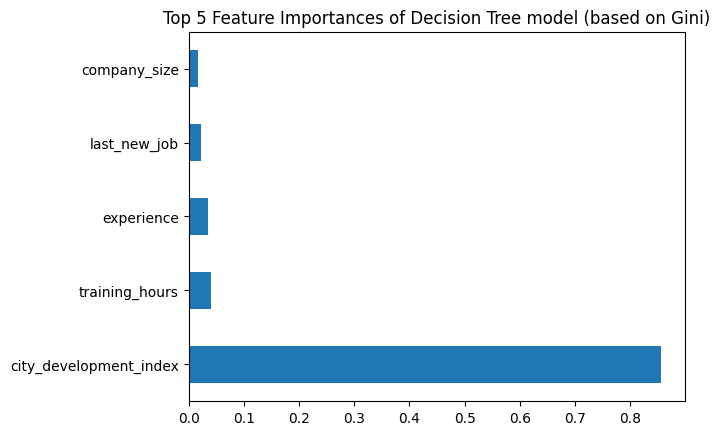

In [41]:
feature_importances_dt.nlargest(5).plot(kind="barh")

plt.title('Top 5 Feature Importances of Decision Tree model (based on Gini)')

Result from the chart shows that **city_development_index** has the highest gini value 0.856 which means it significantly contributes to the model.

**Visualizing Decision Tree**

In [42]:
tree.export_graphviz(decision_tree=model_dt, out_file='decision-tree-gini.dot', feature_names=cols)

call(['dot', '-Tpng', 'decision-tree-gini.dot', '-o', 'decision-tree-gini.png', '-Gdpi=300'])

0

In [43]:
Image(filename = 'decision-tree-gini.png')

### **2. Random Forest**

Feature importances from Random Forest Classifiers are observed by using Entropy.

In [44]:
weight_rf = model_rf.feature_importances_

feature_importances_rf = pd.Series(weight_rf, index=cols)
print(feature_importances_rf)

city_development_index    0.480752
gender                    0.018603
relevent_experience       0.016465
enrolled_university       0.033080
education_level           0.020243
major_discipline          0.015379
experience                0.112892
company_size              0.070337
company_type              0.051389
last_new_job              0.055723
training_hours            0.125138
dtype: float64


Text(0.5, 1.0, 'Top 5 Feature Importances of Random Forest model (based on Entropy)')

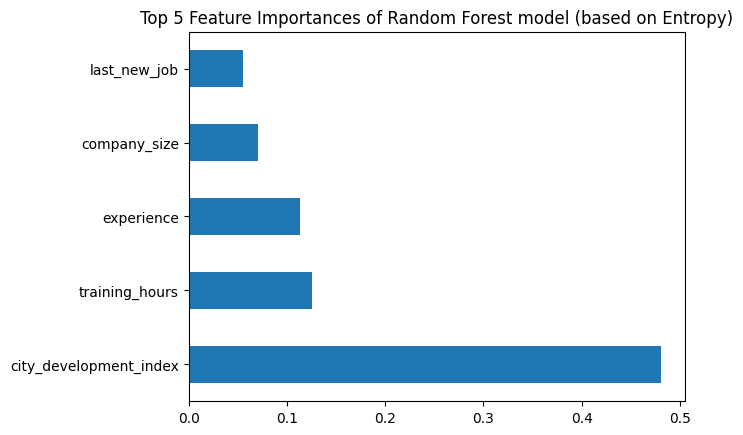

In [45]:
feature_importances_rf.nlargest(5).plot(kind="barh")

plt.title('Top 5 Feature Importances of Random Forest model (based on Entropy)')

Result from the chart shows that **city_development_index** has the highest entropy value 0.48 which means it significantly contributes to the model.

**Visualizing 10 trees in Random Forest**

In [46]:
len(model_rf.estimators_)

10

There are **10 trees** in Random Forest.

In [54]:
#Example to visualize 2/10 trees in RF
fig, axes = plt.subplots(nrows = 2,ncols = 1,figsize = (15,10), dpi=900)
for index in range(0, 2):
    tree.plot_tree(model_rf.estimators_[index],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Tree: ' + str(index + 1), fontsize = 11)
fig.savefig('rf_5trees.png')

## **Conclusion**

Among the two models, Decision Tree and Random Forest Classifiers, the latter exhibits better performance:

*   The Decision Tree model yields an accuracy score of **86%**, while the Random Forest model achieves an accuracy score of **88%**.

The computation of feature importance, based on gini and entropy, in both models shows that **city_development_index (CDI)** is the most significant feature.

* CDI is a comprehensive measure of city development. A higher CDI indicates better economic, social, infrastructure, and environmental conditions. This positive correlation suggests that cities with higher CDIs might have larger job markets, leading to more job opportunities and potentially higher job change rates.

